#### Imporing Neccessary Libraries

In [1]:

import sys
import os
import matplotlib as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import importlib

# Adding my working path to System path.

system_path = os.path.abspath('..')
if system_path in sys.path:
    print('Path already exist')
else:
    sys.path.append(system_path)


##### Auto load the changes from the src script folder.

In [2]:
%load_ext autoreload
%autoreload 2
from src.EDA_publisher_analysis import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\W-HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Task 1

#### Loading the raw_analyst_ratings dataset and read as dataframe

In [3]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')

#### Creating Instance of the Class with dataframe

In [4]:
analysis_data =EDA_publisher_analysis(data)

###  Descriptive Statistics:
#### 1. Obtain basic statistics for textual lengths (like headline length).
#### Objectives
* Analyze how the headline lengths are distributed across different percentiles.
* Determine the average and median headline lengths to understand typical values.
* Evaluate the standard deviation to understand the variability in headline lengths.

In [5]:
analysis_data.descriptive_headline()

count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

#### Interpretation of the output
   * There are 104,857 total headlines analyzed.
   * The mean length is approximately 73.00 characters, indicating the average size of the headlines.
   * A standard deviation of about 40.29 suggests a wide range of lengths, indicating that while some headlines are short, others are significantly longer.
   * The shortest headline is 3 characters long.
   *  25% of headlines are 47 characters or shorter.
   * 50% median length is 64 characters, indicating that half of the headlines are shorter than this and half are longer.
   * 75% of headlines are 87 characters or shorter.

##### 2. Count the number of articles per publisher to identify which publishers are most active.
##### Objectives
 * Determine which publishers produce the most articles.
 * Assess how the number of articles varies among different publishers.
 * Look for any noticeable trends or patterns in the data.

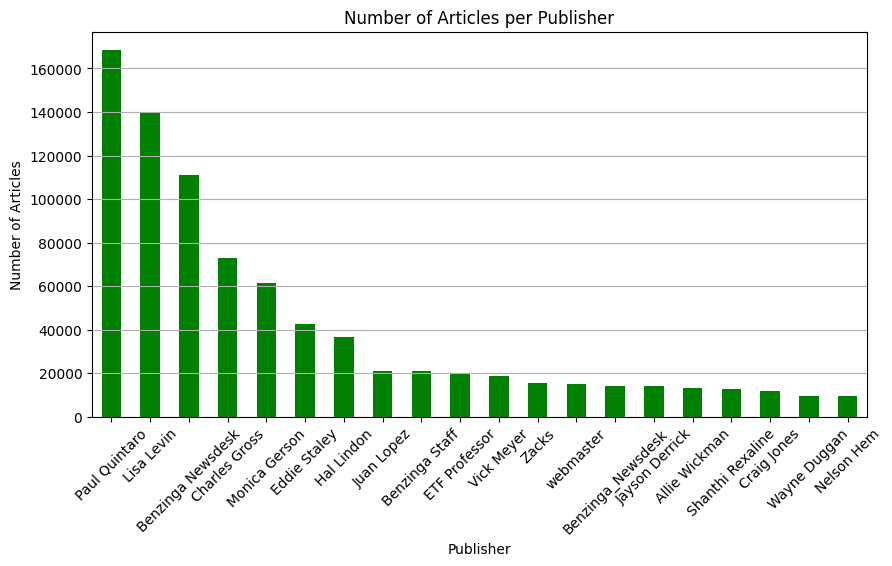

In [6]:
analysis_data.descriptive_statistics()  

#### Interprating the graph
  * The graph illustrates a long tail distribution, where a few publishers dominate article production while many others contribute relatively few articles.
  * Publishers like Monica Geoss and Eddie Grasso show moderate article counts, while others, like Wayne Dougan and Webmaster, have significantly fewer articles.
  * The concentration of articles among a few publishers suggests that a small number of sources may have a larger influence on overall content.

#### 3. Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
##### Objectives
 * Analyze how article publications have changed from 2010 to 2020.
 *  Identify any significant spikes or drops in article publication.
 *  Evaluate whether there is a general trend of increasing or decreasing publications over the decade.

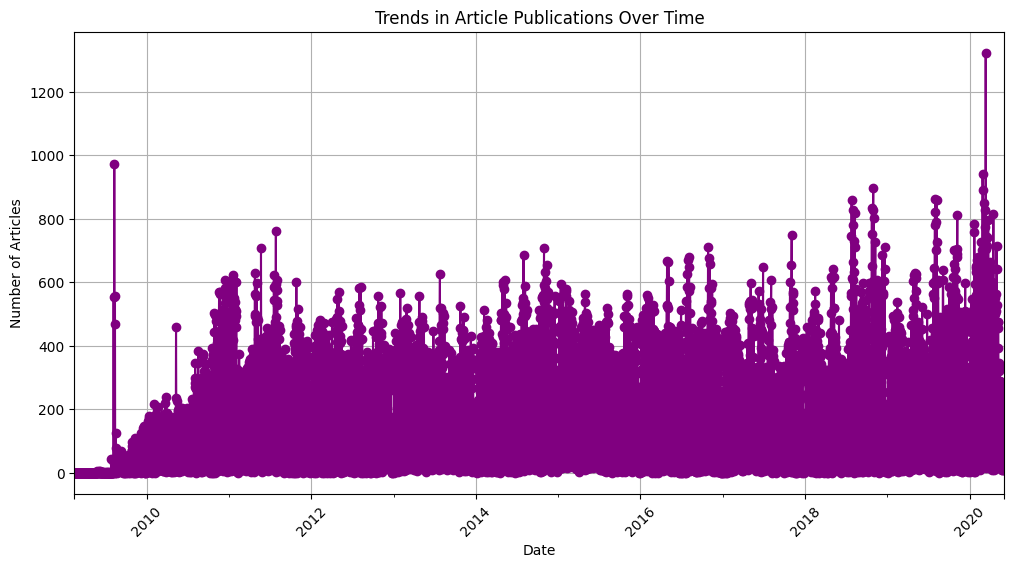


Publication Trends Summary:
 count    4128.000000
mean      243.968508
std       199.796969
min         0.000000
25%        19.000000
50%       281.000000
75%       394.000000
max      1323.000000
dtype: float64


In [7]:
## Analyze publication trends
analysis_data.analyze_publication_trends() 

##### Analysis of Results
  * There is a noticeable upward trend in the number of articles published from 2010 to 2020, indicating an increase in content production over this period.
  * The graph shows several peaks, particularly in certain years, with the highest spike occurring in 2020, where the number of articles exceeds 1,200. This could indicate a response to significant events or trends that drove higher content production.
  * The growth appears to be gradual, especially in the early years (2010-2014). However, there is a marked increase in articles published in later years, particularly from 2015 onward.
  * The fluctuations in the number of articles suggest that while there is an overall growth trend, there are periods of both significant activity and relative calm.
  * The data shows some variability within individual years, with months or quarters experiencing more articles than others. This could reflect seasonal trends in publishing or specific events that generated more content.

#### 4. Text Analysis(Topic Modeling):
##### Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events 
##### Objectives
  * Analyze the main topics identified in the dataset and their significance.
  * Determine how frequently each topic appears relative to the others.
  * Evaluate which topics may be more relevant or prominent in the context of the data.

In [ ]:
## forst Cleaning the data with numbers and special caracters
analysis_data.clean_data()

Data cleaning completed.


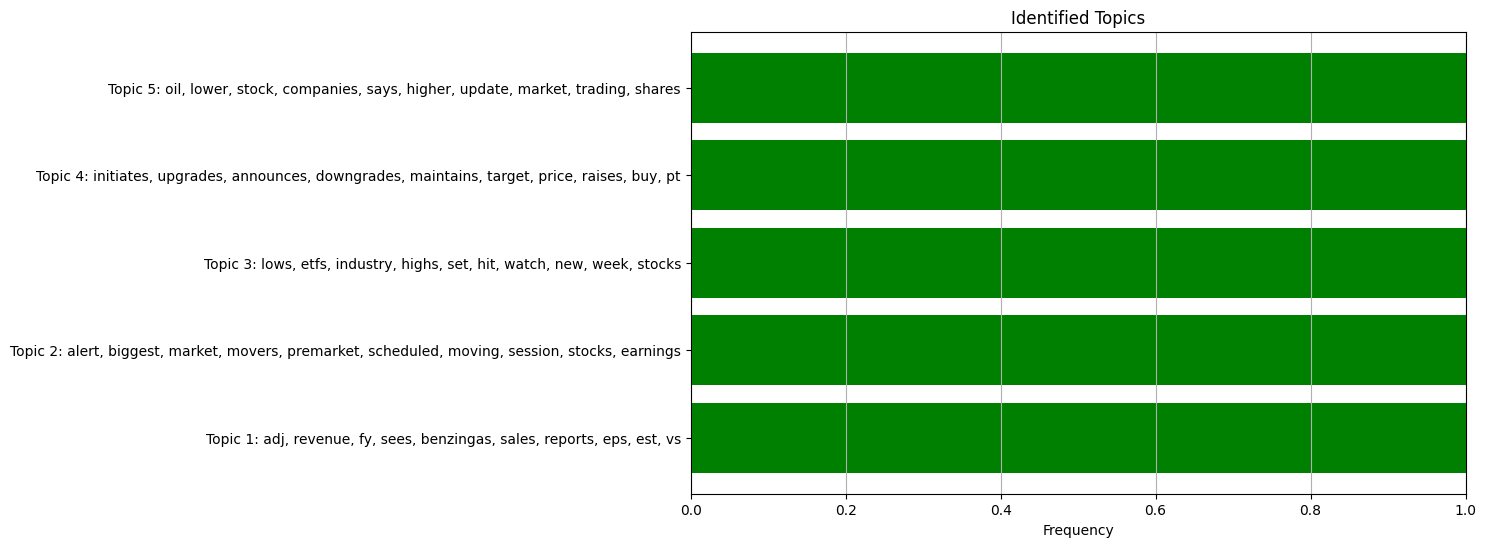

In [90]:
analysis_data.analyze_topics_in_articles(num_topics=5, num_keywords=10)

#### Analysis of Results
##### Key Topics Identified:
The graph lists multiple topics related to market activities, such as stock updates, trading, and financial announcements. Specific topics include:
* Topic 0: Stock updates and trading information.
* Topic 1: Financial metrics like revenue and earnings.
* Topic 2: Alerts regarding market conditions and scheduled events.
* Topic 3: Initiatives regarding stock actions like upgrades and downgrades
* Frequency Distribution:
   * The graph indicates that there is no significant variation in the frequency of the topics, as the bars are of similar length and do not show a clear dominant topic.
   * This suggests that the topics are relatively evenly represented in the dataset.
   * The consistent frequency across topics may indicate a balanced focus on various aspects of market news, rather than a concentration on a single area. This could be beneficial for providing a comprehensive view of the market landscape.

#### 5. How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
##### Objectives
  * Analyze the overall frequency of publications over time from 2010 to 2020
  * Highlight specific dates with unusually high publication frequency.
  * Investigate potential reasons behind these spikes in publication frequency.

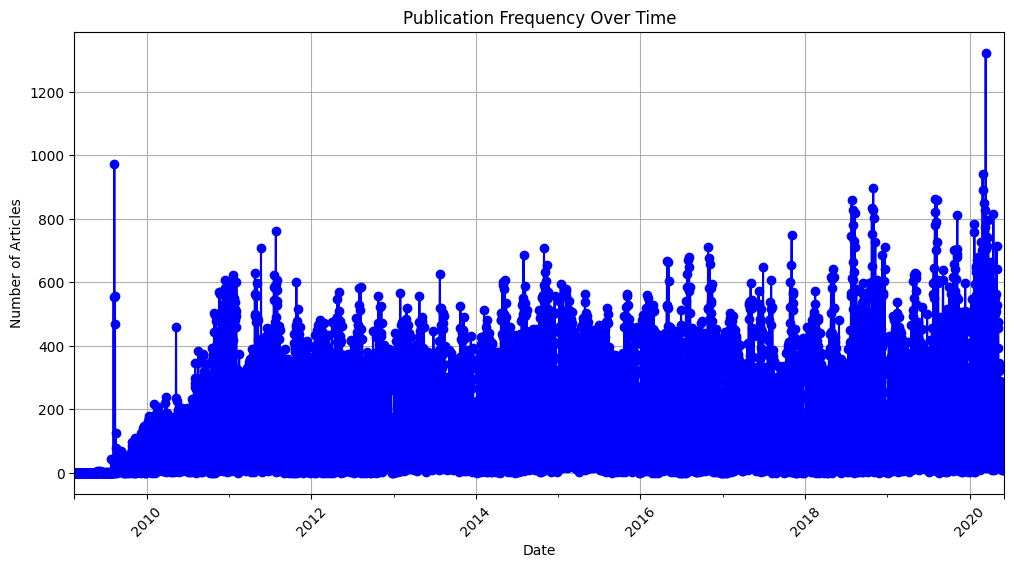


Spikes in Publication Frequency:
 date
2009-04-27      1
2009-04-29      1
2009-05-22      1
2009-05-27      5
2009-05-29      2
             ... 
2020-04-29    714
2020-04-30    641
2020-05-26    262
2020-05-27    228
2020-05-28    236
Length: 1031, dtype: int64


In [8]:
analysis_data.analyze_publication_frequency_variation()

#### Imterpretation of Results
 * The graph shows a clear upward trend in publication frequency from 2010 to 2020, indicating a steady increase in the number of articles published over the years.
 * The table provides specific dates with spikes in publication frequency, particularly notable spikes in late April 2020. 
 * These spikes indicate a substantial increase in publication activity on these dates compared to other periods.
 * The data shows consistent growth, particularly pronounced from 2015 onward, suggesting an increase in content production and possibly greater engagement with audiences.
 * The high publication counts in April 2020 may correlate with significant events or news cycles. For instance, this period coincides with the onset of the COVID-19 pandemic, which likely drove increased demand for information and reporting.

##### 6.  Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.
##### Objectives
 * Analyze how article publications are distributed across different hours of the day.
 * Look for any specific hour(s) that may show significantly higher or lower
 * Determine if publication activity is evenly spread throughout the day or concentrated in specific time frames.

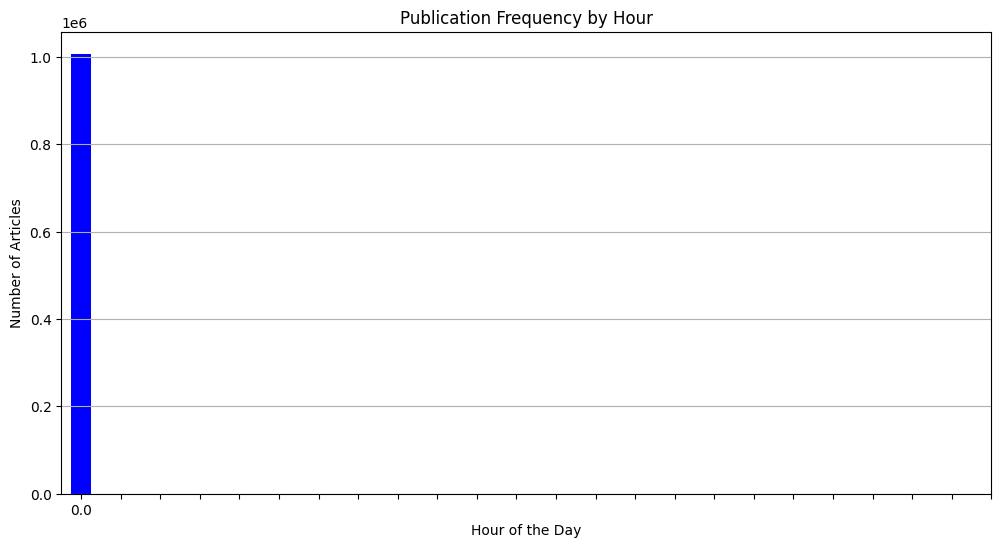


Peak Publishing Hours:
 publication_hour
0.0    1007102
Name: count, dtype: int64


In [9]:
analysis_data.analyze_publication_times_for_trading()
        

#### Analysis of Results
* Although the graph indicates a remarkably high total number of articles published—nearly one million—it does not clearly show how this volume is allocated throughout the day. 
* The graph might not adequately depict how publication frequency fluctuates by hour if there is no appreciable variation in the bars. The majority of articles seem to be released in a very short period of time, which results in an overwhelming peak.
* The uniformity of the bars could imply that either the data is heavily skewed toward a specific hour or that the graph is not scaled properly to show meaningful differences between hours.

##### 7. Which publishers contribute most to the news feed? 
##### Objectives
  * Analyze the top publishers in terms of article quantity.
  * Understand the contribution of each publisher to the overall content landscape.
  * Determine how publishers compare to one another in terms of article

In [13]:
analysis_data.analyze_publishers_contribution()


Top Publishers:
 publisher
Paul Quintaro        168435
Lisa Levin           139785
Benzinga Newsdesk    111281
Charles Gross         72892
Monica Gerson         61374
Eddie Staley          42702
Hal Lindon            36445
Juan Lopez            21153
Benzinga Staff        20926
ETF Professor         19812
Name: count, dtype: int64


##### Analyzing Results
* The analysis reveals a clear hierarchy among publishers, with Paul Quintaro leading significantly in article output. This concentration of articles among a few publishers suggests a competitive environment where a small number of entities shape the content landscape. Understanding this distribution can help stakeholders identify key players and inform strategies for collaboration or competition.

#### 8. If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.
##### Objectives
 * Analyze which domains contribute the most articles to the news feed.
 * Understand how article contributions are distributed among different domains
 * Determine the diversity of content sources and identify any potential biases toward specific domains.


Top Domains Contributing to News Feed:
 domain
benzinga              5976
gmail                   96
andyswan                 4
investdiva               2
tothetick                2
eosdetroit               1
forextraininggroup       1
stockmetrix              1
Name: count, dtype: int64


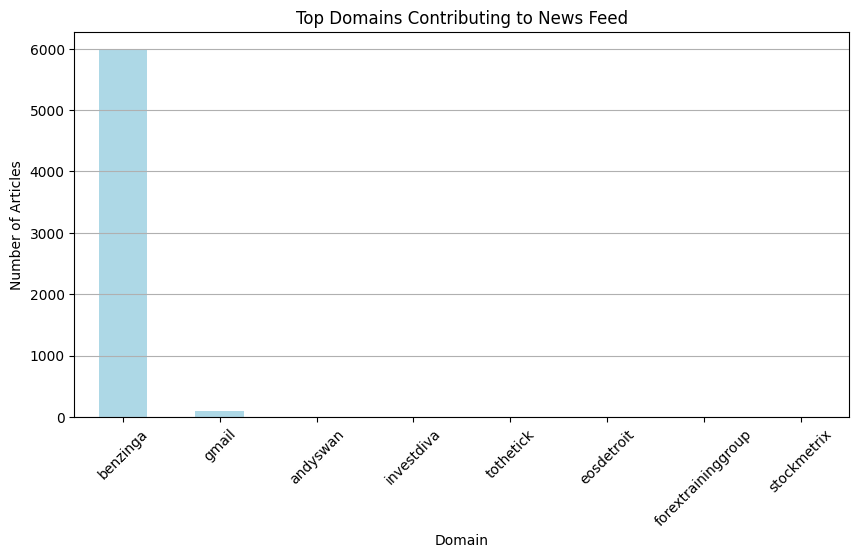

In [11]:
analysis_data.analyze_unique_domains_from_publishers()

##### Analyzing the graph
  * According to the analysis, Benzinga is the main source of news feed articles, with other domains contributing very little. This focus calls into question the balance and diversity of the information provided, indicating that more diverse sources are required to improve the news feed's richness. Stakeholders can make more informed decisions regarding audience engagement and content sourcing by having a better understanding of this dynamic.